In [2]:
# Data manipulation
import pandas as pd
import numpy as np

# Options for pandas
pd.options.display.max_columns = None
pd.options.display.max_rows = None

pd.options.display.max_colwidth=-1

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from gensim import corpora, models
import gensim
import nltk
##nltk.download("stopwords")


%autoreload 2

# Visualizations
import plotly.express as px

import matplotlib.pyplot as plt
import seaborn as sns
import re


import gensim
from gensim import corpora

# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim

UsageError: Line magic function `%autoreload` not found.


In [4]:
import pandas as pd
import numpy as np

In [5]:
df=pd.read_csv("vamsi_webscrapping_Amazon.csv",sep=',')
df.head()

,reviews
0,Vivo y90 is a very good product at this price range.\n
1,Mobile is good.. But rear Camra is not up to the mark.\n
2,Nice. Worth to buy\n
3,"I could see many people gave the review with standard words.. Like camera not up to the mark, there is no fast charging.. Yes there are the minus points but u can't expect those in this price range..16 gb variant i didn't like and there is no headset available in the box..apart from these mobile is awesome and it was a worthy buy for me in rs.6290.\n"
4,Excellent mobile It's camera was very good but mobile run slowly\n


In [6]:
train=df
train.shape  ## to check the no. of columns and rows are present in dataset 

(6440, 1)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6440 entries, 0 to 6439
Data columns (total 1 columns):
reviews    6440 non-null object
dtypes: object(1)
memory usage: 50.4+ KB


In [8]:
type(train['reviews']) ## checking the type of the data 

pandas.core.series.Series

In [9]:
train['reviews'].head() ## checking the first 5 dats in reviews

0    Vivo y90 is a very good product at this price range.\n                                                                                                                                                                                                                                                                                                          
1    Mobile is good.. But rear Camra is not up to the mark.\n                                                                                                                                                                                                                                                                                                        
2    Nice. Worth to buy\n                                                                                                                                                                                                                                                                   

### Cleaning Data

In [10]:
import re
import string# to remove punctuations
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
def clean_text(text):
    ps=PorterStemmer()
    text1 = re.sub(r'^https?:\/\/.*[\r\n]*', '', text)
    print(text1)
    text_cleaned=" ".join([x for x in text1 if x not in string.punctuation])
    print(text_cleaned)
    text_cleaned=text_cleaned.lower()
    print(text_cleaned)
    text_cleaned=text_cleaned.split(" ")
    print(text_cleaned)
    text_tokens=[token for token in text_cleaned if token not in STOPWORDS]
    stem_words=[ps.stem(stem) for stem in text_tokens ]
    text=" ".join(stem_words)
    text_cleaned=re.sub(' +',' ',text)
    return text_cleaned      ## cleaning the data 

In [11]:
train['cleaned']=train['reviews'].apply(lambda x:re.sub('http.*',' ',x))

In [12]:
#train['cleaned1']=train['cleaned'].replace('\n', '')
train['cleaned']=train['cleaned'].apply(lambda x:re.sub("\s+"," ",x)) ## removing the \n in the data 

In [13]:
train['cleaned'].head(5)

0    Vivo y90 is a very good product at this price range.                                                                                                                                                                                                                                                                                                           
1    Mobile is good.. But rear Camra is not up to the mark.                                                                                                                                                                                                                                                                                                         
2    Nice. Worth to buy                                                                                                                                                                                                                                                                       

In [15]:
train['cleaned'].tolist()

['Vivo y90 is a very good product at this price range. ',
 'Mobile is good.. But rear Camra is not up to the mark. ',
 'Nice. Worth to buy ',
 "I could see many people gave the review with standard words.. Like camera not up to the mark, there is no fast charging.. Yes there are the minus points but u can't expect those in this price range..16 gb variant i didn't like and there is no headset available in the box..apart from these mobile is awesome and it was a worthy buy for me in rs.6290. ",
 "Excellent mobile It's camera was very good but mobile run slowly ",
 'Mobile charging too late, per hour average 20 per only charged ',
 'Good. Internal Memory should be 32GB. It is not possible to install app in Memory card or External Memory. 16GB is finishing with 5-6 download apps ',
 "Phone looks great.. doesn't have earphones in the set, just data cable and adapter. ",
 'awesome in 6500 ',
 'Its been more than 2 month..no issues. Since its a budget phone you cannot except high resolution/q

In [16]:
train['cleaned'] = train['cleaned'].str.replace('[^\w\s#@/:%.,_-]', '', flags=re.UNICODE) ## removing emojis in data

In [17]:
train['cleaned'] = train['cleaned'].replace('\.','', regex=True) ## removing the \,.,spaces in data

In [18]:
train['cleaned'] = train['cleaned'].replace(',','.', regex=True)

In [19]:
train['cleaned'].tolist()

['Vivo y90 is a very good product at this price range ',
 'Mobile is good But rear Camra is not up to the mark ',
 'Nice Worth to buy ',
 'I could see many people gave the review with standard words Like camera not up to the mark. there is no fast charging Yes there are the minus points but u cant expect those in this price range16 gb variant i didnt like and there is no headset available in the boxapart from these mobile is awesome and it was a worthy buy for me in rs6290 ',
 'Excellent mobile Its camera was very good but mobile run slowly ',
 'Mobile charging too late. per hour average 20 per only charged ',
 'Good Internal Memory should be 32GB It is not possible to install app in Memory card or External Memory 16GB is finishing with 5-6 download apps ',
 'Phone looks great doesnt have earphones in the set. just data cable and adapter ',
 'awesome in 6500 ',
 'Its been more than 2 monthno issues Since its a budget phone you cannot except high resolution/quality camera Battery is ama

In [20]:
train['cleaned'] = train['cleaned'].apply(lambda x:re.sub('#[\w]+', '', x)) ## removing the links in the data of present

In [21]:
train['cleaned'].head()

0    Vivo y90 is a very good product at this price range                                                                                                                                                                                                                                                                                                
1    Mobile is good But rear Camra is not up to the mark                                                                                                                                                                                                                                                                                                
2    Nice Worth to buy                                                                                                                                                                                                                                                                                                

In [22]:
#train['cleaned']=train['cleaned'].apply(lambda x:re.sub(x))
train['cleaned']=train['cleaned'].apply(lambda cleaned_review:"".join([x for x in cleaned_review if x not in string.punctuation]))

In [23]:
train['cleaned'].head()

0    Vivo y90 is a very good product at this price range                                                                                                                                                                                                                                                                                               
1    Mobile is good But rear Camra is not up to the mark                                                                                                                                                                                                                                                                                               
2    Nice Worth to buy                                                                                                                                                                                                                                                                                                  

In [21]:
train['cleaned']=train['cleaned'].apply(lambda x:x.lower())

In [22]:
train['cleaned'].head()

0    vivo y90 is a very good product at this price range                                                                                                                                                                                                                                                                                               
1    mobile is good but rear camra is not up to the mark                                                                                                                                                                                                                                                                                               
2    nice worth to buy                                                                                                                                                                                                                                                                                                  

## There are still some punctuation marks. let us use regex and remove them. This may be because there was no space between the words

In [23]:
import string
def removePunct(text):
    text = text.translate(str.maketrans({key: " {0} ".format(key) for key in string.punctuation}))
    
    text_cleaned="".join([x for x in text if x not in string.punctuation])
    text_cleaned=re.sub(r'[^\x00-\x7F]+',' ', text_cleaned) ## Remove Ascii Characters
    text_cleaned=re.sub('\s+', ' ', text_cleaned).strip()
    return text_cleaned

In [24]:
train['cleaned']=train['cleaned'].apply(lambda x:removePunct(x))
train.head()

,reviews,cleaned
0,Vivo y90 is a very good product at this price range.\n,vivo y90 is a very good product at this price range
1,Mobile is good.. But rear Camra is not up to the mark.\n,mobile is good but rear camra is not up to the mark
2,Nice. Worth to buy\n,nice worth to buy
3,"I could see many people gave the review with standard words.. Like camera not up to the mark, there is no fast charging.. Yes there are the minus points but u can't expect those in this price range..16 gb variant i didn't like and there is no headset available in the box..apart from these mobile is awesome and it was a worthy buy for me in rs.6290.\n",i could see many people gave the review with standard words like camera not up to the mark there is no fast charging yes there are the minus points but u cant expect those in this price range16 gb variant i didnt like and there is no headset available in the boxapart from these mobile is awesome and it was a worthy buy for me in rs6290
4,Excellent mobile It's camera was very good but mobile run slowly\n,excellent mobile its camera was very good but mobile run slowly


## Tokinization

In [27]:
tokenizer = RegexpTokenizer(r'\w+') 

In [28]:
train1 = train.cleaned[0]

In [29]:
tokens = tokenizer.tokenize(train1.lower())

In [30]:
print('{} characters in string vs {} words in a list'.format(len(train1),                                                             len(tokens)))
print(tokens[:10])

51 characters in string vs 11 words in a list
['vivo', 'y90', 'is', 'a', 'very', 'good', 'product', 'at', 'this', 'price']


In [31]:
nltk_stpwd = stopwords.words('english') ### giving language for stopwords

In [32]:
print(len(set(nltk_stpwd)))
print(nltk_stpwd[:10])

179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [33]:
stopped_tokens = [token for token in tokens if not token in nltk_stpwd]
print(stopped_tokens[:10])

['vivo', 'y90', 'good', 'product', 'price', 'range']


In [34]:
sb_stemmer = SnowballStemmer('english')

In [35]:
stemmed_tokens = [sb_stemmer.stem(token) for token in stopped_tokens]
print(stemmed_tokens)

['vivo', 'y90', 'good', 'product', 'price', 'rang']


In [36]:
num_reviews = df.shape[0]
doc_set = [train.cleaned[i] for i in range(num_reviews)]

In [37]:
texts = []

In [38]:
for doc in doc_set:
    tokens = tokenizer.tokenize(doc.lower())
    stopped_tokens = [token for token in tokens if not token in nltk_stpwd]
    stemmed_tokens = [sb_stemmer.stem(token) for token in stopped_tokens]
    texts.append(stemmed_tokens)
    
print(texts[1])

['mobil', 'good', 'rear', 'camra', 'mark']


In [39]:
texts_dict = corpora.Dictionary(texts)
texts_dict.save('elec_review.dict') 
print(texts_dict)  #### Create a dictionary using corpora

Dictionary(6233 unique tokens: ['good', 'price', 'product', 'rang', 'vivo']...)


In [46]:
texts_dict.filter_extremes(no_below=30, no_above=0.15) # inlace filter
print(texts_dict)
print("top terms:")
print(sorted(texts_dict.token2id.items(), key=operator.itemgetter(1), reverse = False)[:10])

Dictionary(506 unique tokens: ['price', 'product', 'rang', 'vivo', 'mark']...)
top terms:
[('price', 0), ('product', 1), ('rang', 2), ('vivo', 3), ('mark', 4), ('mobil', 5), ('rear', 6), ('buy', 7), ('nice', 8), ('worth', 9)]


In [47]:
corpus = [texts_dict.doc2bow(text) for text in texts]
len(corpus)

6440

In [48]:
%%time 
# Matrix Market format https://radimrehurek.com/gensim/corpora/mmcorpus.html, why exactly? I don't know
gensim.corpora.MmCorpus.serialize('vivomobiles.mm', corpus)

CPU times: user 174 ms, sys: 13.6 ms, total: 188 ms
Wall time: 196 ms


### Sentiment Analysis

In [50]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [64]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [65]:
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    #print(score)
    return score
    #print("{:-<40} {}".format(sentence, str(score)))

In [66]:
t=(sentiment_analyzer_scores("The phone is super cool."))

In [67]:
t.values()

dict_values([0.0, 0.326, 0.674, 0.7351])

In [68]:
t['compound']

0.7351

In [69]:
def compound_score(text):
    sc=sentiment_analyzer_scores(text)
    return sc['compound']

In [70]:
compound_score("The phone is super cool")

0.7351

In [71]:
train['comp_score']=train['cleaned'].apply(lambda x:compound_score(x))

In [72]:
train.sample(5)

,reviews,cleaned,comp_score,sentiment
1739,"1. Camera - 4.5 (cam2api supports so use google cam, you will get a surprising results and selfie portrait is also there).2. Screen Quality - 4.23. Ergonomic - 4.0 (weight distribution is good but it's feels a bit bulky, i used many smartphone having 5000mah battery still it's a bit bulky, check smartron tphone p which have 5000mah battery with a great ergonomic).4. Software - 3.9 (interface of a smartphone or any gadgets is a kind of personal taste, people say there are bloatware and camera is not good but both are fine for me because I'm a pro and i can debloat those apps via pc without rooting and increase the camera quality by gcam but still there are many bugs in Funtouch OS like touchscreen optimization, customization and many more. Note - Those who are using MIUI or who likes stock android please don't buy this device unless interface doesn't bother you, nothing will matter of a smartphone unless you like the software experience.5. Battery - 4.7 (everything is fine expect idle draining is slightly higher i mean that's a negligible idle dropping, 2% of dropping in 4 hours in standby, that's a software issue not battery, battery is superfine).Fast Charging 4.5 -( 0-90% in 1 hour 45-50mins, 90-100% takes 30-40mins it's good considering 5000mah battery, no major heating issue while charging).6. PubG - 4.3 (I have 3gb ram variant so pubg is okay-ish but if you are a hardcore gamer don't buy this phone unless your budget is very tight, no major heating issues. Note - you will feel some lag if you play for more that 90mins continuously).7. Camera - 4.2/4.7 for system camera app and gcam respectively (I used both the system camera app and google camera appas cam2api is available, no portrait mode in system camera app's front camera, considering the price you will not regret if you use google camera app. Note - Google camera app doesn't support wide-angle camera lens and slow motion doesn't support by both camera apps).8. Sound - 3.8 (Not that loud and bass is not good, even while playing pubg i feel the speaker is not that good, btw doesn't bother me because i uses headphones most of the time. Note - If bass optimization doesn't bother you and you uses headphones most of the time, then the speaker and sound quality will not bother you).9. Miscellaneous - 4.3 ( Fingerprint scanner and Face unlock is pretty fast, Still No type-C but i think it's understandable as it has fast charging and a separate 3.5mm jack considering the price btw 8A have type-C under 7k so why not 😅, Call quality is superfine, Native video calling is supported, dt2w - double touch to wake is there, double touch to lock in home & lock screen is also there, you can click pics by touching finger sensor in system camera app, screen touch optimization is good but it needs more optimization for smoothness)Conclusion : If the software or interface (Funtouch OS) will not bother you then go for it, it's a great device in this price point.Hope this will help you !! 😃\n",1 camera 45 cam2api supports so use google cam you will get a surprising results and selfie portrait is also there2 screen quality 423 ergonomic 40 weight distribution is good but its feels a bit bulky i used many smartphone having 5000mah battery still its a bit bulky check smartron tphone p which have 5000mah battery with a great ergonomic4 software 39 interface of a smartphone or any gadgets is a kind of personal taste people say there are bloatware and camera is not good but both are fine for me because im a pro and i can debloat those apps via pc without rooting and increase the camera quality by gcam but still there are many bugs in funtouch os like touchscreen optimization customization and many more note those who are using miui or who likes stock android please dont buy this device unless interface doesnt bother you nothing will matter of a smartphone unless you like the software experience5 battery 47 everything is fine expect idle draining is sligh

In [83]:
def emotion(score):
    if score>0.6:
        return "positive"
    if score<0.5:
        return "negative"
    if score==0.5:
        return "neutral"

In [84]:
train['sentiment']=train['comp_score'].apply(lambda x:emotion(x))

In [85]:
train.sample(5)

,reviews,cleaned,comp_score,sentiment
4670,Almost good .\n,almost good,0.3832,negative
2611,Best mobile except camera\n,best mobile except camera,0.6369,positive
6423,Good\n,good,0.4404,negative
570,Good\n,good,0.4404,negative
3231,Good quality\n,good quality,0.4404,negative


##

In [86]:
from collections import Counter 

In [87]:
import seaborn as sns

Text(0.5, 1.0, 'Distribution of sentiment')

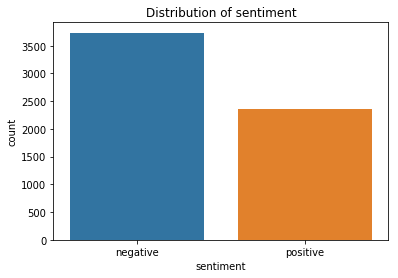

In [88]:
sns.countplot(train['sentiment']).set_title("Distribution of sentiment")

## Let us now look at what are the common words used in positive and negative reviews
## First extract positive and negative reviews into seperate variables


In [89]:
from collections import Counter 

In [90]:
positive_reviews=train.loc[train['sentiment']=='positive','cleaned'].tolist()
positive_reviews[0:5]

['i could see many people gave the review with standard words like camera not up to the mark there is no fast charging yes there are the minus points but u cant expect those in this price range16 gb variant i didnt like and there is no headset available in the boxapart from these mobile is awesome and it was a worthy buy for me in rs6290',
 'phone looks great doesnt have earphones in the set just data cable and adapter',
 'awesome in 6500',
 'i could see many people gave the review with standard words like camera not up to the mark there is no fast charging yes there are the minus points but u cant expect those in this price range16 gb variant i didnt like and there is no headset available in the boxapart from these mobile is awesome and it was a worthy buy for me in rs6290',
 'phone looks great doesnt have earphones in the set just data cable and adapter']

In [91]:
negative_reviews=train.loc[train['sentiment']=='negative','cleaned'].tolist()
negative_reviews[0:5]

['vivo y90 is a very good product at this price range',
 'mobile is good but rear camra is not up to the mark',
 'mobile charging too late per hour average 20 per only charged',
 'good internal memory should be 32gb it is not possible to install app in memory card or external memory 16gb is finishing with 56 download apps',
 'vivo y90 is a very good product at this price range']

### Tokenise the words and use Counter to keep count of words

In [121]:
def getMostCommon(cleaned,topn=20):
    reviews=" ".join(cleaned)
    tokenised_reviews=reviews.split(" ")
    
    
    freq_counter=Counter(tokenised_reviews)
    return freq_counter.most_common(topn)

In [122]:
top_20_positive_review_words=getMostCommon(positive_reviews,20)

In [105]:
top_20_positive_review_words

[('is', 4376),
 ('the', 3276),
 ('and', 2904),
 ('phone', 2146),
 ('good', 2107),
 ('a', 2006),
 ('this', 1925),
 ('camera', 1908),
 ('for', 1741),
 ('in', 1740),
 ('i', 1670),
 ('it', 1571),
 ('to', 1490),
 ('with', 1316),
 ('of', 1274),
 ('battery', 1256),
 ('very', 1112),
 ('quality', 884),
 ('not', 860),
 ('but', 840)]

In [106]:
top_20_negative_review_words=getMostCommon(negative_reviews,20)

In [107]:
top_20_negative_review_words

[('is', 2908),
 ('good', 1626),
 ('not', 1508),
 ('camera', 1482),
 ('the', 1434),
 ('phone', 1412),
 ('this', 1211),
 ('and', 1207),
 ('i', 1099),
 ('very', 1004),
 ('quality', 996),
 ('to', 939),
 ('for', 875),
 ('it', 811),
 ('in', 769),
 ('but', 710),
 ('of', 672),
 ('a', 608),
 ('product', 521),
 ('with', 519)]

In [109]:
neg_words=[val[0] for val in top_20_negative_review_words]
pos_words=[val[0] for val in top_20_positive_review_words]

set(neg_words) - set(pos_words)

{'product'}

In [110]:
set(pos_words) - set(neg_words)

{'battery'}

## Plotting the Top 50 most common words in negative and positive words

In [123]:
def plotMostCommonWords(cleaned,topn=50,title="Positive Review",color="blue",axis=None):
    top_words=getMostCommon(cleaned,topn=topn)
    data=pd.DataFrame()
    data['words']=[val[0] for val in top_words]
    data['freq']=[val[1] for val in top_words]
    if axis!=None:
        sns.barplot(y='words',x='freq',data=data,color=color,ax=axis).set_title(title+" top "+str(topn))
    else:
        sns.barplot(y='words',x='freq',data=data,color=color).set_title(title+" top "+str(topn))

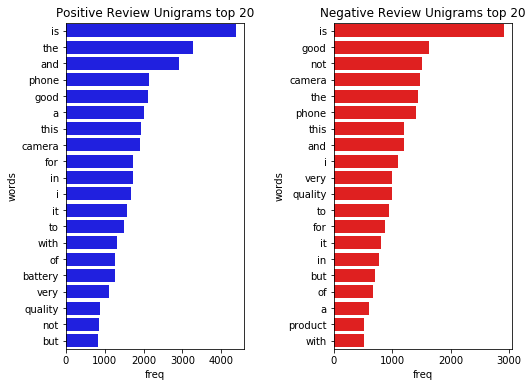

In [124]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 8,6 ## Sets the heigth and width of image


fig,ax=plt.subplots(1,2)
fig.subplots_adjust(wspace=0.5) #Adjusts the space between the two plots
plotMostCommonWords(positive_reviews,20,"Positive Review Unigrams",axis=ax[0])

plotMostCommonWords(negative_reviews,20,"Negative Review Unigrams",color="red",axis=ax[1])

In [125]:
def generateNGram(text,n=2):
    tokens=text.split(" ")
    ngrams = zip(*[tokens[i:] for i in range(n)])
    return ["_".join(ngram) for ngram in ngrams]

In [126]:
positive_reviews_bigrams=[" ".join(generateNGram(review)) for review in positive_reviews]
negative_reviews_bigrams=[" ".join(generateNGram(review)) for review in negative_reviews]

In [127]:
positive_reviews_bigrams[0:5]

['i_could could_see see_many many_people people_gave gave_the the_review review_with with_standard standard_words words_like like_camera camera_not not_up up_to to_the the_mark mark_there there_is is_no no_fast fast_charging charging_yes yes_there there_are are_the the_minus minus_points points_but but_u u_cant cant_expect expect_those those_in in_this this_price price_range16 range16_gb gb_variant variant_i i_didnt didnt_like like_and and_there there_is is_no no_headset headset_available available_in in_the the_boxapart boxapart_from from_these these_mobile mobile_is is_awesome awesome_and and_it it_was was_a a_worthy worthy_buy buy_for for_me me_in in_rs6290',
 'phone_looks looks_great great_doesnt doesnt_have have_earphones earphones_in in_the the_set set_just just_data data_cable cable_and and_adapter',
 'awesome_in in_6500',
 'i_could could_see see_many many_people people_gave gave_the the_review review_with with_standard standard_words words_like like_camera camera_not not_up up_

In [128]:
top_20_positive_bigrams=getMostCommon(positive_reviews_bigrams,topn=20)
top_20_positive_bigrams

[('this_phone', 454),
 ('this_price', 424),
 ('is_good', 406),
 ('quality_is', 385),
 ('phone_is', 377),
 ('camera_is', 373),
 ('very_good', 369),
 ('is_very', 349),
 ('camera_quality', 344),
 ('in_this', 332),
 ('the_phone', 330),
 ('battery_life', 295),
 ('of_the', 291),
 ('it_is', 288),
 ('is_not', 259),
 ('i_am', 250),
 ('is_a', 247),
 ('is_also', 221),
 ('in_the', 208),
 ('at_this', 204)]

In [129]:
top_20_negative_bigrams=getMostCommon(negative_reviews_bigrams,topn=20)
top_20_negative_bigrams

[('', 677),
 ('is_not', 518),
 ('camera_quality', 410),
 ('is_very', 396),
 ('quality_is', 385),
 ('this_phone', 340),
 ('phone_is', 288),
 ('camera_is', 264),
 ('not_good', 234),
 ('very_good', 196),
 ('in_this', 191),
 ('is_good', 189),
 ('the_phone', 176),
 ('this_price', 161),
 ('go_for', 153),
 ('it_is', 148),
 ('very_bad', 143),
 ('good_product', 130),
 ('i_am', 124),
 ('very_poor', 122)]

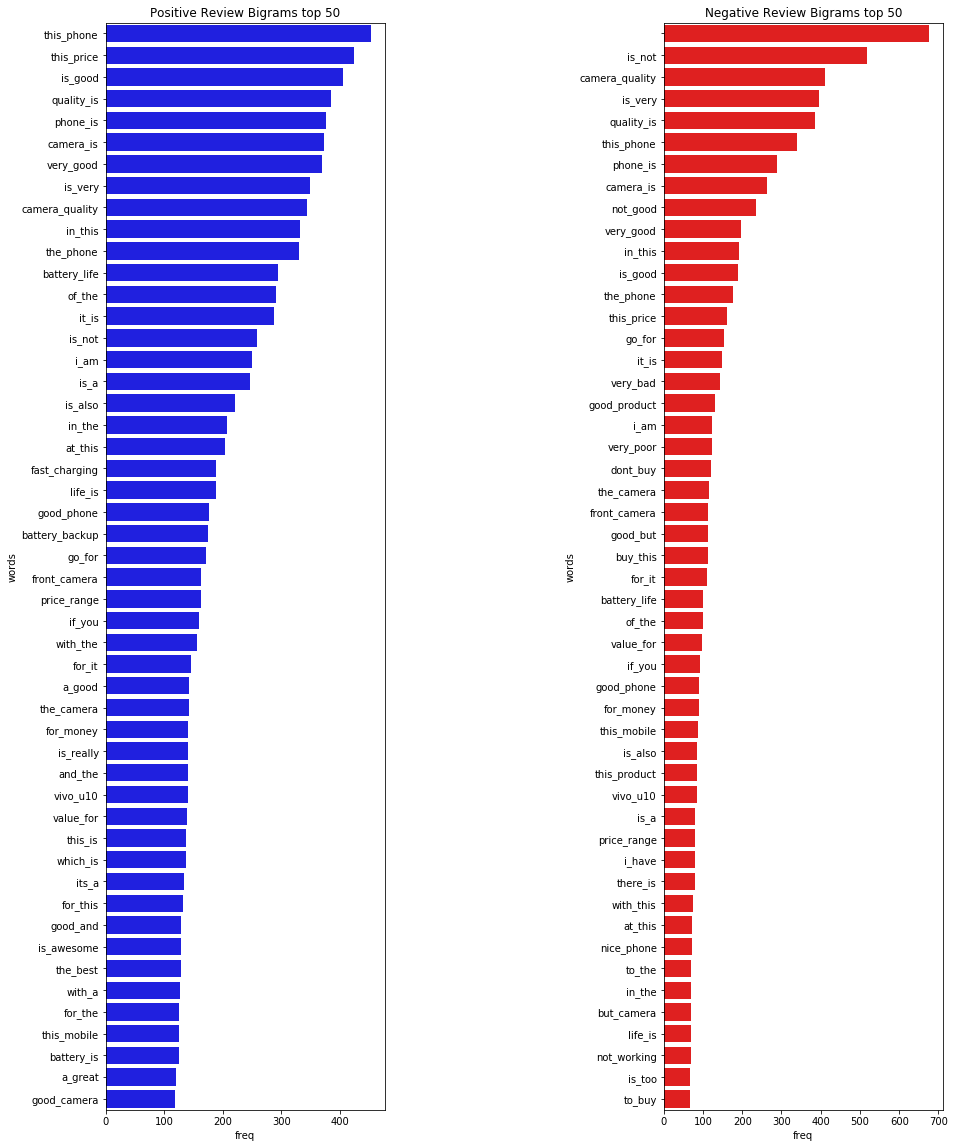

In [130]:
rcParams['figure.figsize'] = 15,20
fig,ax=plt.subplots(1,2)
fig.subplots_adjust(wspace=1) #Adjusts the space between the two plots
plotMostCommonWords(positive_reviews_bigrams,50,"Positive Review Bigrams",axis=ax[0])

plotMostCommonWords(negative_reviews_bigrams,50,"Negative Review Bigrams",color="red",axis=ax[1])

In [131]:
def generateNGram(text,n=3):
    tokens=text.split(" ")
    ngrams = zip(*[tokens[i:] for i in range(n)])
    return ["_".join(ngram) for ngram in ngrams]

In [132]:
positive_reviews_trigrams=[" ".join(generateNGram(review)) for review in positive_reviews]
negative_reviews_trigrams=[" ".join(generateNGram(review)) for review in negative_reviews]

In [133]:
top_20_positive_trigrams=getMostCommon(positive_reviews_trigrams,topn=20)
top_20_positive_trigrams

[('camera_quality_is', 204),
 ('in_this_price', 171),
 ('at_this_price', 146),
 ('battery_life_is', 143),
 ('is_very_good', 138),
 ('this_phone_is', 126),
 ('the_phone_is', 125),
 ('value_for_money', 120),
 ('this_price_range', 118),
 ('go_for_it', 114),
 ('', 93),
 ('if_you_are', 77),
 ('one_of_the', 65),
 ('of_the_phone', 64),
 ('phone_in_this', 61),
 ('is_not_good', 57),
 ('for_this_price', 56),
 ('very_good_phone', 55),
 ('camera_is_not', 55),
 ('to_buy_this', 54)]

In [134]:
top_20_negative_trigrams=getMostCommon(negative_reviews_trigrams,topn=20)
top_20_negative_trigrams

[('', 1166),
 ('camera_quality_is', 192),
 ('is_not_good', 119),
 ('quality_is_very', 106),
 ('quality_is_not', 98),
 ('this_phone_is', 88),
 ('value_for_money', 83),
 ('in_this_price', 81),
 ('go_for_it', 81),
 ('camera_is_not', 73),
 ('is_very_poor', 70),
 ('the_phone_is', 66),
 ('this_price_range', 65),
 ('dont_go_for', 57),
 ('is_good_but', 56),
 ('is_very_good', 55),
 ('battery_life_is', 50),
 ('the_camera_quality', 48),
 ('buy_this_phone', 47),
 ('dont_buy_this', 46)]

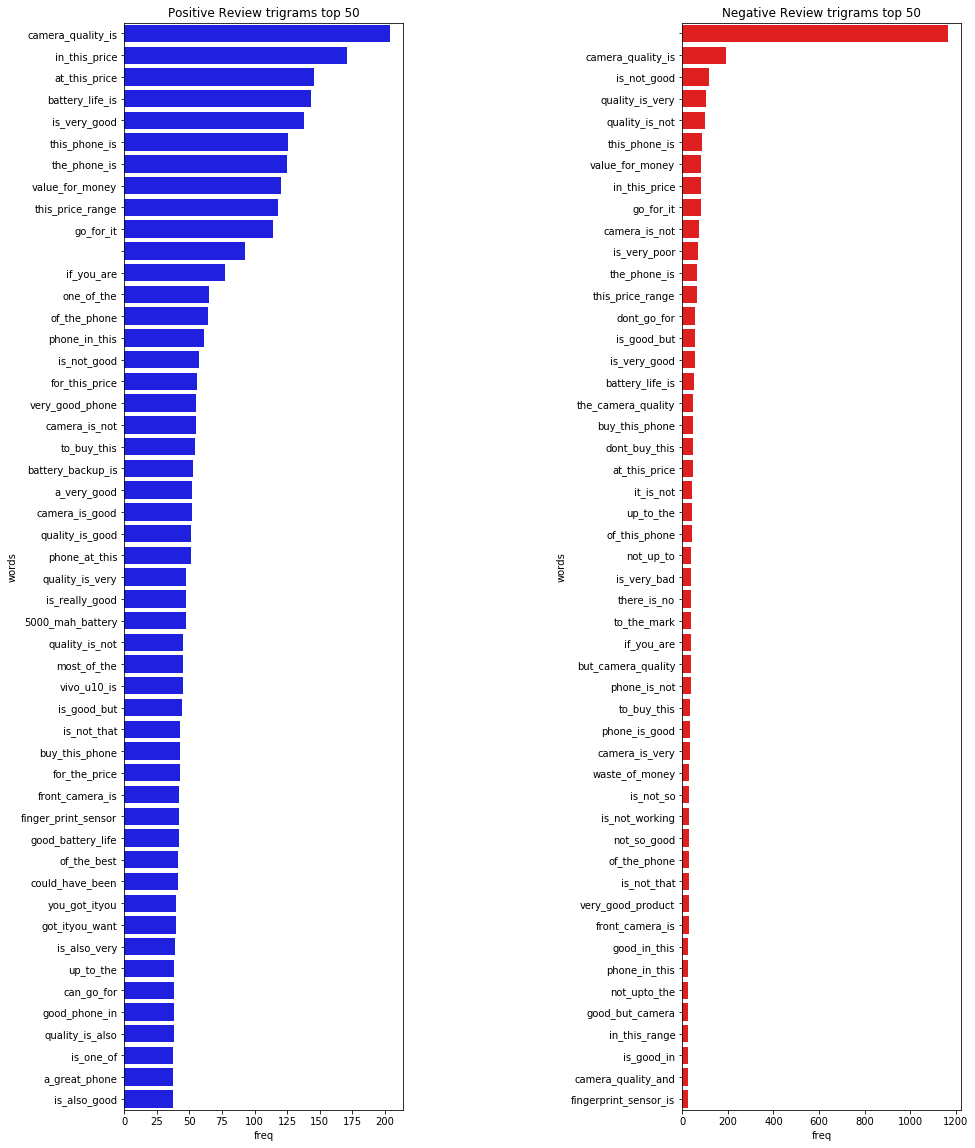

In [135]:
rcParams['figure.figsize'] = 15,20
fig,ax=plt.subplots(1,2)
fig.subplots_adjust(wspace=1) #Adjusts the space between the two plots
plotMostCommonWords(positive_reviews_trigrams,50,"Positive Review trigrams",axis=ax[0])

plotMostCommonWords(negative_reviews_trigrams,50,"Negative Review trigrams",color="red",axis=ax[1])

Text(0.5, 1.0, 'positive word')

(-0.5, 1999.5, 1999.5, -0.5)

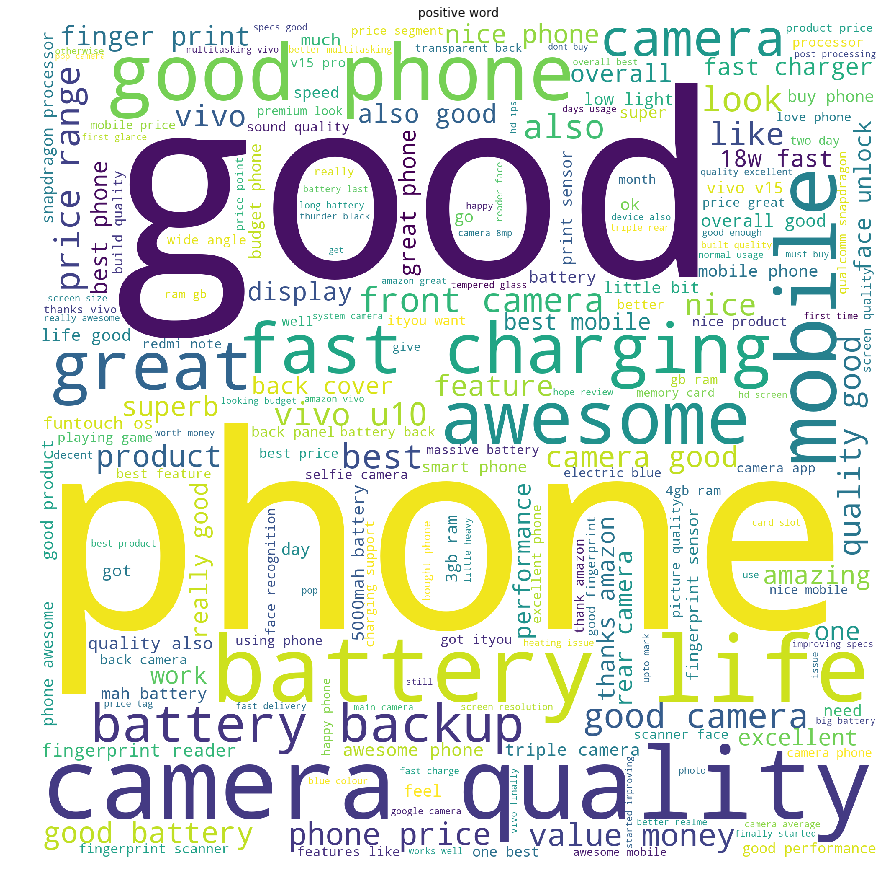

In [141]:
from wordcloud import WordCloud
wordcloud = WordCloud(height=2000, width=2000, stopwords=set(stopwords.words('english')), background_color='white')
wordcloud = wordcloud.generate(' '.join(train.loc[train['sentiment']=='positive','cleaned'].tolist()))
plt.imshow(wordcloud)
plt.title("positive word")
plt.axis('off')
plt.show()

Text(0.5, 1.0, 'negative word')

(-0.5, 1999.5, 1999.5, -0.5)

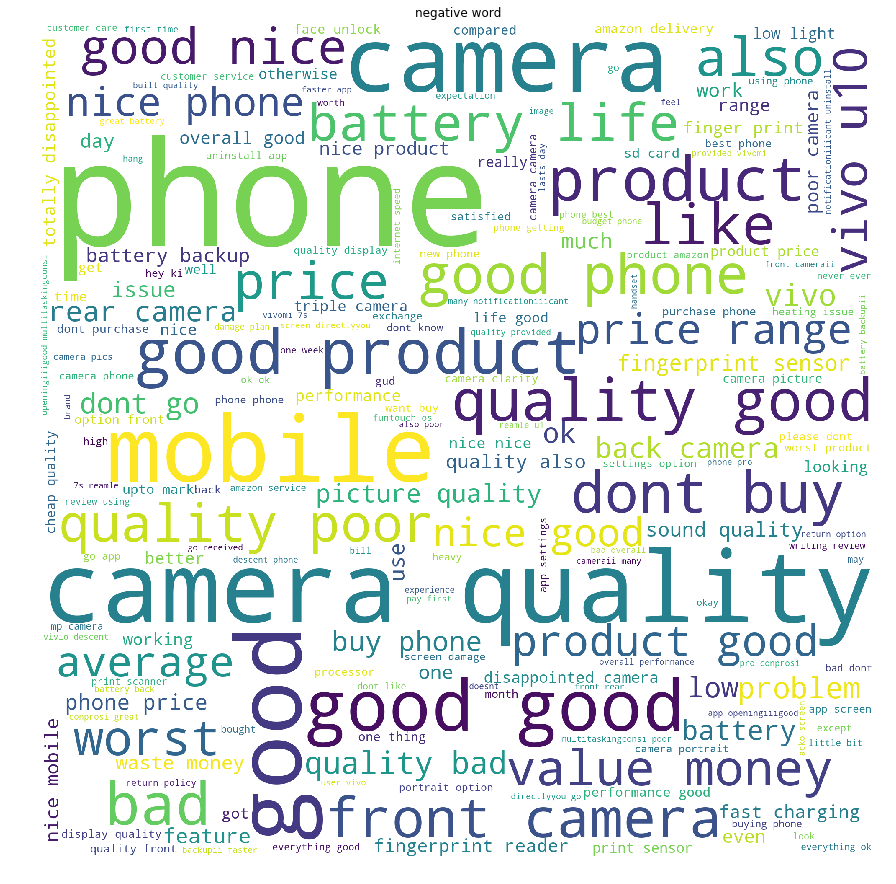

In [143]:
from wordcloud import WordCloud
wordcloud = WordCloud(height=2000, width=2000, stopwords=set(stopwords.words('english')), background_color='white')
wordcloud = wordcloud.generate(' '.join(train.loc[train['sentiment']=='negative','cleaned'].tolist()))
plt.imshow(wordcloud)
plt.title("negative word")
plt.axis('off')
plt.show()